In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
def load_images_from_folder(folder):
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [148]:
images = []

folder1 = "pieces/images1/"
folder2 = "pieces/images4/"
folder3 = "pieces/images9/"

for i in range(23):
    load_images_from_folder(folder1 + str(i+1))
for i in range(8, 13):
    load_images_from_folder(folder2 + str(i+1))
for i in range(12):
    load_images_from_folder(folder3 + str(i+1))
    
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)

y = 4
x = 4
h = 90
w = 90
for i in range(0, 72):
    images[i] = images[i][y:y+h, x:x+w]
    
y = 7
x = 7
h = 90
w = 90
for i in range(72, len(images)):
    images[i] = images[i][y:y+h, x:x+w]

resized_images = []

for i in range(len(images)):
    img = images[i]
    scale_percent = 36 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    resized_images.append(resized)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'pieces/images9/9'

In [55]:
np.shape(resized_images)

(360, 32, 32)

In [4]:
X = np.asarray(resized_images) 
X = X / 230

y = []
for j in range(28):
    for i in range(6):
        y.append(i)
        y.append(i)
        
for j in range(24):
    y.append(6)
    
y = np.asarray(y)

randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
y = y[randomize]

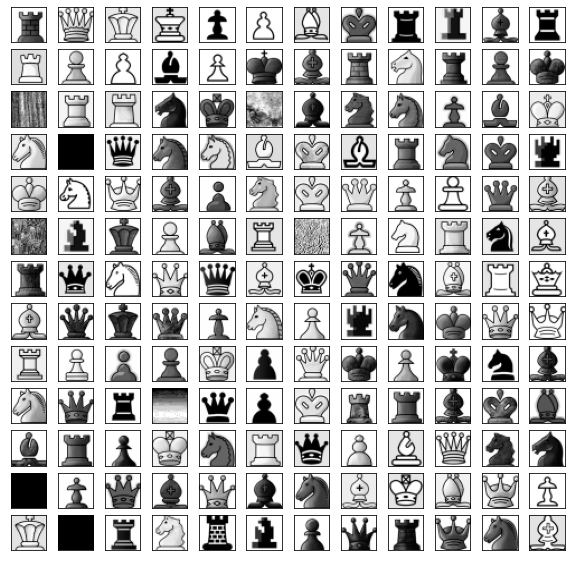

In [5]:
plt.figure(figsize=(10,10))
for i in range(156):
    plt.subplot(13,12,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap="gray")
plt.show()

TypeError: 'int' object is not subscriptable

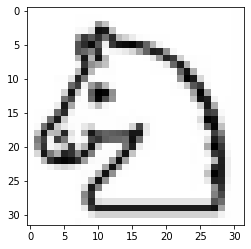

In [146]:
plt.imshow(X[49], cmap='gray')
y[49]

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(7)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.fit(X[0:330], y[0:330], epochs=20)

Epoch 1/20
11/11 [==============================] - 0s 10ms/step - loss: 2.2157 - accuracy: 0.1879
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 1.7026 - accuracy: 0.3394
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 1.3975 - accuracy: 0.5030
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 1.2278 - accuracy: 0.6030
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: 1.0197 - accuracy: 0.7152
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.8250 - accuracy: 0.8242
Epoch 7/20
11/11 [==============================] - 0s 2ms/step - loss: 0.7461 - accuracy: 0.8394
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.8667
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.8606
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.5094 - accuracy: 0.9030
Epoch 11/20
11/11 

In [13]:
test_loss, test_acc = model.evaluate(X[330:360], y[330:360], verbose=2)

1/1 - 0s - loss: 0.2466 - accuracy: 0.9333


In [52]:
predictions = model.predict(X[144:156])
predicted_class = np.argmax(predictions, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y[144:156])))

training accuracy: 1.00


In [29]:
predicted_class

array([0, 4, 1, 0, 4, 4, 2, 2, 5, 3, 2, 3], dtype=int64)

In [22]:
color = np.empty([360], dtype=float, order='C')
color[range(1,360,2)] = 1
color[range(0,360,2)] = 0
color = color[randomize]

In [23]:
np.shape(color)
color

array([1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [24]:
model_color = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2)
])

In [25]:
model_color.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model_color.fit(X[0:330], color[0:330], epochs=20)

Epoch 1/20
11/11 [==============================] - 0s 2ms/step - loss: 0.8597 - accuracy: 0.5636
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.9152
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.9364
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 0.9394
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1934 - accuracy: 0.9424
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.9576
Epoch 7/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.9515
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9545
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1483 - accuracy: 0.9636
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1872 - accuracy: 0.9515
Epoch 11/20
11/11 [

In [27]:
test_loss, test_acc = model_color.evaluate(X[330:360], color[330:360], verbose=2)

1/1 - 0s - loss: 0.0810 - accuracy: 0.9667


In [53]:
predictions = model_color.predict(X[144:156])
predicted_class = np.argmax(predictions, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == color[144:156])))

training accuracy: 0.92


In [54]:
predicted_class

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [55]:
predictions

array([[ 4.990902  , -1.950807  ],
       [-3.9248486 ,  4.2380357 ],
       [ 0.89297104,  0.93942165],
       [ 3.563532  , -0.6142756 ],
       [-5.2373123 ,  4.262118  ],
       [ 3.5494108 , -0.3555071 ],
       [ 5.1632333 , -1.4372213 ],
       [-0.03804167,  1.9168215 ],
       [ 1.1428435 ,  0.7170166 ],
       [ 6.2796884 , -1.9147584 ],
       [ 1.0635002 ,  0.24036238],
       [-0.9770061 ,  1.9319555 ]], dtype=float32)

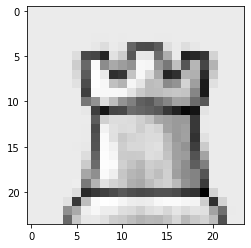

In [57]:
plt.imshow(resized, cmap="gray")

In [58]:
np.shape(resized)

(24, 24)

Конь
Чёрный


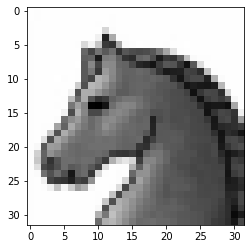

In [31]:
new_image = cv2.imread('22.jpg')
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
y = 4
x = 4
h = 90
w = 90
new_image = new_image[y:y+h, x:x+w]
img = new_image
scale_percent = 36 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized, cmap="gray")
resized = np.array([resized])
figure_predict = model.predict(resized)
color_predict = model_color.predict(resized)
predicted_figure = np.argmax(figure_predict, axis=1)
predicted_color = np.argmax(color_predict, axis=1)
if predicted_figure == 0:
    print("Пешка")
elif predicted_figure == 1:
    print("Конь")
elif predicted_figure == 2:
    print("Слон")
elif predicted_figure == 3:
    print("Ладья")
elif predicted_figure == 4:
    print("Ферзь")
elif predicted_figure == 5:
    print("Король")
elif predicted_figure == 6:
    print("Пусто")
if predicted_color == 0:
    print("Белая")
else:
    print("Чёрный")

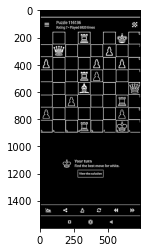

In [107]:
img = cv2.imread("images/img.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray, cmap = "gray")
gray = cv2.GaussianBlur(gray, (5,5), 0)
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)
plt.imshow(thresh, cmap = "gray")
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [108]:
biggest = None
max_area = 0
for i in contours:
        area = cv2.contourArea(i)
        if area > 500:
                peri = cv2.arcLength(i,True)
                approx = cv2.approxPolyDP(i,0.02*peri,True)
                if area > max_area and len(approx)==4:
                        biggest = approx
                        max_area = area

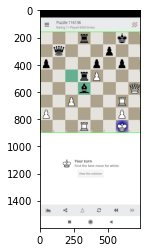

In [109]:
x,y,w,h = cv2.boundingRect(biggest)
plt.imshow(cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2))

In [135]:
biggest

array([[[ 40, 160]],

       [[  0, 898]],

       [[737, 898]],

       [[737, 160]]], dtype=int32)

In [136]:
biggest[0][0][0]=0

In [127]:
def rectify(h):
        h = h.reshape((4,2))
        hnew = np.zeros((4,2),dtype = np.float32)

        add = h.sum(1)
        hnew[0] = h[np.argmin(add)]
        hnew[2] = h[np.argmax(add)]
        
        diff = np.diff(h,axis = 1)
        hnew[1] = h[np.argmin(diff)]
        hnew[3] = h[np.argmax(diff)]
 
        return hnew

In [137]:
approx=rectify(biggest)

In [138]:
h = np.array([ [0,0],[255,0],[255,255],[0,255] ],np.float32)

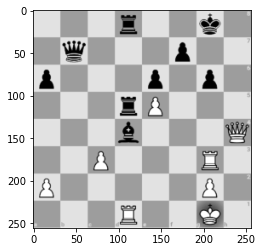

In [139]:
retval = cv2.getPerspectiveTransform(approx,h)
warp = cv2.warpPerspective(gray,retval,(256,256))
plt.imshow(warp, cmap='gray')

In [94]:
cropped = warp[0:32, 0:32]
cv2.imshow("cropped", cropped)
cv2.waitKey(0)

-1

In [140]:
cells = []
for i in range(8):
    for j in range(8):
        cropped = warp[i*32:(i+1)*32, j*32:(j+1)*32]
        cells.append(cropped)

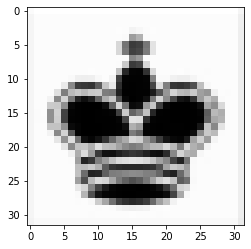

In [156]:
plt.imshow(cells[6], cmap="gray")

In [141]:
cells = np.asarray(cells)
string = []
i=0
for cell in cells:
    cell = np.array([cell])
    figure_predict = model.predict(cell)
    color_predict = model_color.predict(cell)
    predicted_figure = np.argmax(figure_predict, axis=1)
    predicted_color = np.argmax(color_predict, axis=1)
    if predicted_figure == 0:
        if predicted_color == 0:
            string.append('P')
        else:
            string.append('p')
    elif predicted_figure == 1:
        if predicted_color == 0:
            string.append('N')
        else:
            string.append('n')
    elif predicted_figure == 2:
        if predicted_color == 0:
            string.append('B')
        else:
            string.append('b')
    elif predicted_figure == 3:
        if predicted_color == 0:
            string.append('R')
        else:
            string.append('r')
    elif predicted_figure == 4:
        if predicted_color == 0:
            string.append('Q')
        else:
            string.append('q')
    elif predicted_figure == 5:
        if predicted_color == 0:
            string.append('k')
        else:
            string.append('k')
    elif predicted_figure == 6:
        string.append('1')
    if (i+1)%8==0:
        string.append('/')
    i = i + 1

In [103]:
string

['p',
 'n',
 'p',
 'q',
 'k',
 'P',
 'n',
 'p',
 '/',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 'p',
 '/',
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 '/',
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 '/',
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 '/',
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 '/',
 'P',
 1,
 'P',
 1,
 'P',
 1,
 'P',
 1,
 '/',
 1,
 1,
 1,
 1,
 1,
 'B',
 1,
 'R',
 '/']

In [142]:
''.join(string)

'111r11b1/1q111p11/p111p1p1/111r1111/111p1111/11111111/11111111/111R11k1/'

In [147]:
y

160

In [178]:
all_images = np.asarray(resized_images) 
#all_images = all_images.reshape(168, 576) 
all_images = all_images / 230

all_labels = np.zeros([168, 6])
for i in range(168): 
    j = y[i]
    all_labels[i,j] = 1

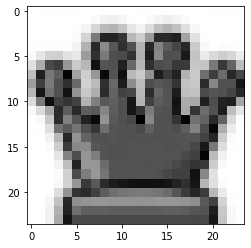

In [173]:
plt.imshow(resized_images[153], cmap="gray")

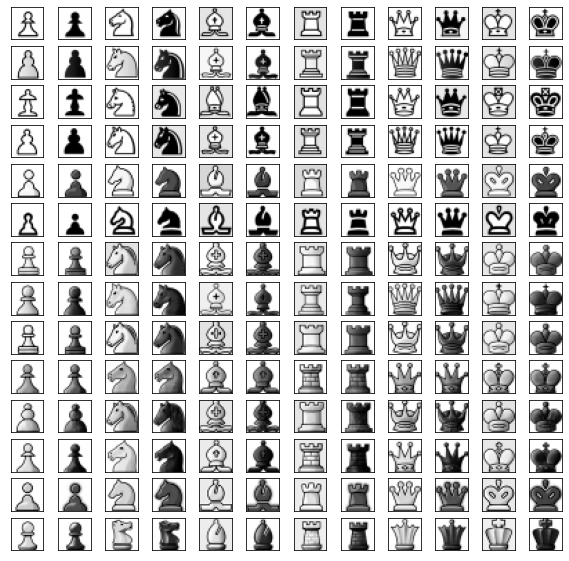

In [136]:
plt.figure(figsize=(10,10))
for i in range(168):
    plt.subplot(14,12,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(resized_images[i], cmap="gray")
plt.show()

In [81]:
for img in images:
    (a, b) = np.shape(img)
    print(a, b)

90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90
90 90


In [88]:
img = images[70]
print('Original Dimensions : ', img.shape)
 
scale_percent = 27 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape) 

Original Dimensions :  (90, 90)
Resized Dimensions :  (24, 24)


In [184]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(24, 24)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(6)
])

In [185]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [191]:
np.shape(train_labels)

(156, 6)

In [237]:
model.fit(all_images[0:144], y[0:144], epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.1667
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.1667
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.1667
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.1667
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0306 - accuracy: 0.1667
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.1667
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.1667
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.1667
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.1667
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.1667


In [319]:
test_loss, test_acc = model.evaluate(all_images[144:156], y[144:156], verbose=2)

1/1 - 0s - loss: 0.0365 - accuracy: 0.1667


In [204]:
np.shape(train_images[1])

(24, 24)

In [239]:
predictions = model.predict(all_images[144:156])

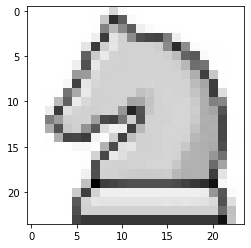

In [241]:
plt.imshow(all_images[146], cmap="gray")

In [252]:
predictions[11]

array([-3.37231   ,  0.78633726, -1.390121  , -2.8247366 ,  1.1397442 ,
        7.297484  ], dtype=float32)

In [313]:
predictions = model.predict(all_images[144:156])
predicted_class = np.argmax(predictions, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y[144:156])))

training accuracy: 1.00


In [302]:
print(np.argmax(predictions, axis=1))

[0 0 1 1 2 2 3 3 4 4 5 5]


In [260]:
print(np.argmax(predictions, axis=1))

[0 0 1 1 2 2 3 3 4 4 5 5]


In [267]:
all_images = all_images.reshape(168, 576)

In [291]:
y = np.asarray(y, dtype=np.int8)

In [265]:
D = 576 # dimensionality
K = 6 # number of classes


In [294]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-4 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(100):

    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples
    
    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
    
    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W
    
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

iteration 0: loss 1.793662


In [295]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.17


In [298]:
hidden_layer = np.maximum(0, np.dot(all_images[132:144], W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print(scores)

[[ 2.84962123e-07  2.42645106e-07  3.17456819e-07  3.24666069e-07
  -4.25677224e-07 -7.44052891e-07]
 [ 2.84962123e-07  2.42645106e-07  3.17456819e-07  3.24666069e-07
  -4.25677224e-07 -7.44052891e-07]
 [ 2.84962123e-07  2.42645106e-07  3.17456819e-07  3.24666069e-07
  -4.25677224e-07 -7.44052891e-07]
 [ 2.84962123e-07  2.42645106e-07  3.17456819e-07  3.24666069e-07
  -4.25677224e-07 -7.44052891e-07]
 [ 2.84962123e-07  2.42645106e-07  3.17456819e-07  3.24666069e-07
  -4.25677224e-07 -7.44052891e-07]
 [ 2.84962123e-07  2.42645106e-07  3.17456819e-07  3.24666069e-07
  -4.25677224e-07 -7.44052891e-07]
 [ 2.84962123e-07  2.42645106e-07  3.17456819e-07  3.24666069e-07
  -4.25677224e-07 -7.44052891e-07]
 [ 2.84962123e-07  2.42645106e-07  3.17456819e-07  3.24666069e-07
  -4.25677224e-07 -7.44052891e-07]
 [ 2.84962123e-07  2.42645106e-07  3.17456819e-07  3.24666069e-07
  -4.25677224e-07 -7.44052891e-07]
 [ 2.84962123e-07  2.42645106e-07  3.17456819e-07  3.24666069e-07
  -4.25677224e-07 -7.4405